In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [2]:
# Loading dataset
df = pd.read_csv("C:/Users/Convenience/Desktop/capstone123/data/job_suitability.csv")

df.head()

,Age,Gender,Education,Tech_Skills,Soft_Skills,Experience_Years,Job_Sector
0,24,Female,High School,1,9,5,Customer Service
1,21,Male,Masters,4,7,0,IT
2,28,Female,Bachelors,4,7,3,Healthcare
3,25,Male,Bachelors,1,1,5,Customer Service
4,22,Male,Masters,3,9,3,IT


In [3]:
# Display dataset shape rows, columns
print("Dataset Shape:", df.shape)

Dataset Shape: (1650000, 7)


In [4]:
# Check columns and data types
print("\nColumns & Types:\n", df.dtypes)


Columns & Types:
 Age                  int64
Gender              object
Education           object
Tech_Skills          int64
Soft_Skills          int64
Experience_Years     int64
Job_Sector          object
dtype: object


## Exploratory Data Analysis (EDA)

In [5]:
# Summary statistics
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
                 Age   Tech_Skills   Soft_Skills  Experience_Years
count  1.650000e+06  1.650000e+06  1.650000e+06      1.650000e+06
mean   2.349714e+01  5.496127e+00  5.500559e+00      2.500695e+00
std    3.451799e+00  2.869973e+00  2.870977e+00      1.708543e+00
min    1.800000e+01  1.000000e+00  1.000000e+00      0.000000e+00
25%    2.000000e+01  3.000000e+00  3.000000e+00      1.000000e+00
50%    2.300000e+01  5.000000e+00  5.000000e+00      3.000000e+00
75%    2.600000e+01  8.000000e+00  8.000000e+00      4.000000e+00
max    2.900000e+01  1.000000e+01  1.000000e+01      5.000000e+00


In [6]:
# Check missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Age                 0
Gender              0
Education           0
Tech_Skills         0
Soft_Skills         0
Experience_Years    0
Job_Sector          0
dtype: int64


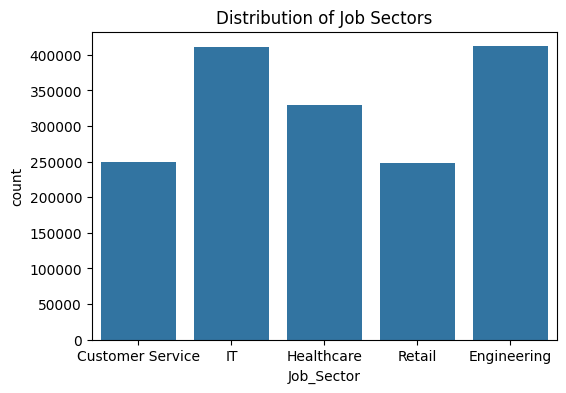

In [7]:
# Visualize distribution of target variable
plt.figure(figsize=(6,4))
sns.countplot(x="Job_Sector", data=df)
plt.title("Distribution of Job Sectors")
plt.show()

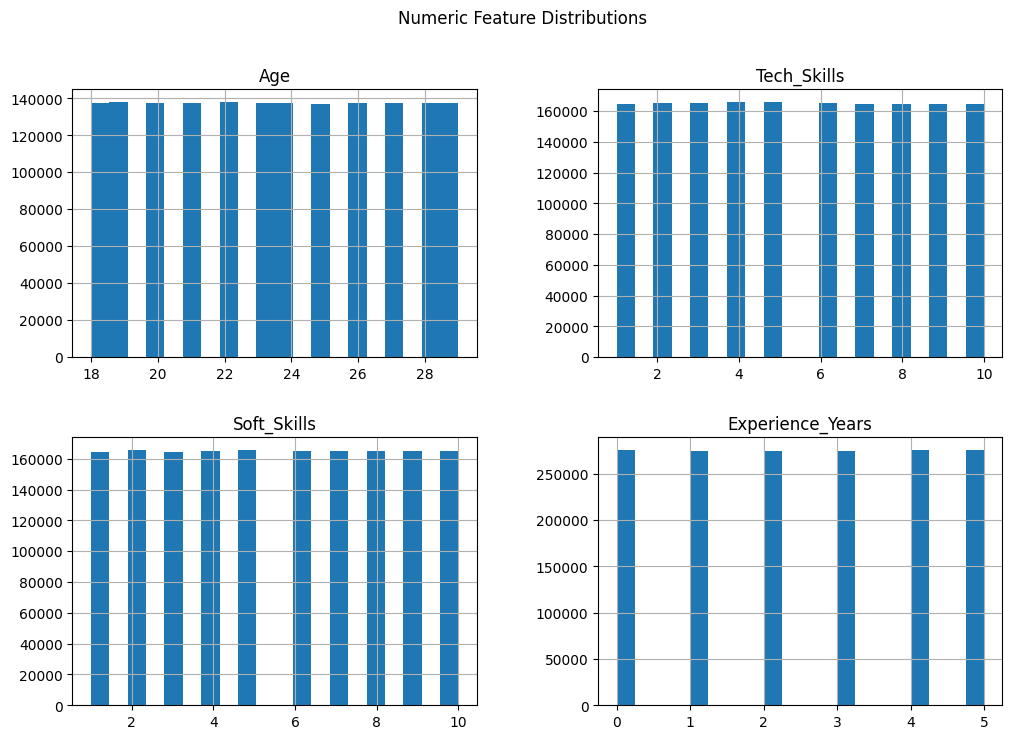

In [8]:
# Visualize numeric feature distributions
numeric_features = df.select_dtypes(include=np.number).columns.tolist()

df[numeric_features].hist(figsize=(12,8), bins=20)
plt.suptitle("Numeric Feature Distributions")
plt.show()


## Data Cleaning & Preprocessing

In [9]:
# Drop duplicates if any
df = df.drop_duplicates()

In [10]:
# Fill missing numeric values with median
for col in numeric_features:
    df[col].fillna(df[col].median(), inplace=True)


In [11]:
# Fill missing categorical values with mode
categorical_features = df.select_dtypes(include="object").columns.tolist()
for col in categorical_features:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [12]:
# Encode categorical features
le = LabelEncoder()
for col in categorical_features:
    if col != "Job_Sector":  # Leave target variable for later
        df[col] = le.fit_transform(df[col])

In [13]:
# Encode target variable
df["Job_Sector"] = le.fit_transform(df["Job_Sector"])


## Feature Engineering

In [14]:
# Create new features, e.g., total skill score
if "Tech_Skills" in df.columns and "Soft_Skills" in df.columns:
    df["Total_Skill_Score"] = df["Tech_Skills"] + df["Soft_Skills"]

In [15]:
# Features and target
X = df.drop("Job_Sector", axis=1)
y = df["Job_Sector"]

In [16]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [17]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training

In [18]:
# Using Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

 ## Evaluating Model

In [19]:
y_pred = model.predict(X_test_scaled)


In [20]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.00043682619559329733


In [21]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     11366
           1       0.00      0.00      0.00     11511
           2       0.00      0.00      0.00     11481
           3       0.00      0.00      0.00     11512
           4       0.00      0.00      0.00     11361

    accuracy                           0.00     57231
   macro avg       0.00      0.00      0.00     57231
weighted avg       0.00      0.00      0.00     57231



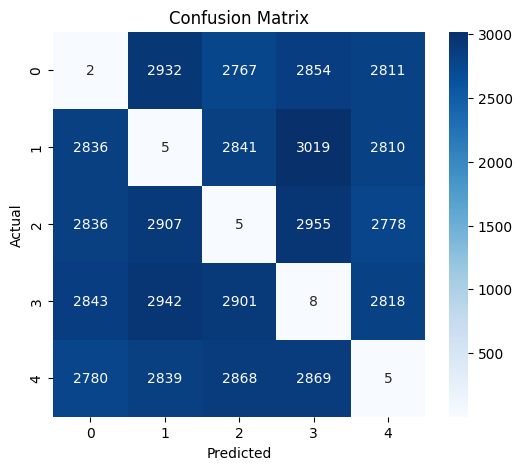

In [22]:
# Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

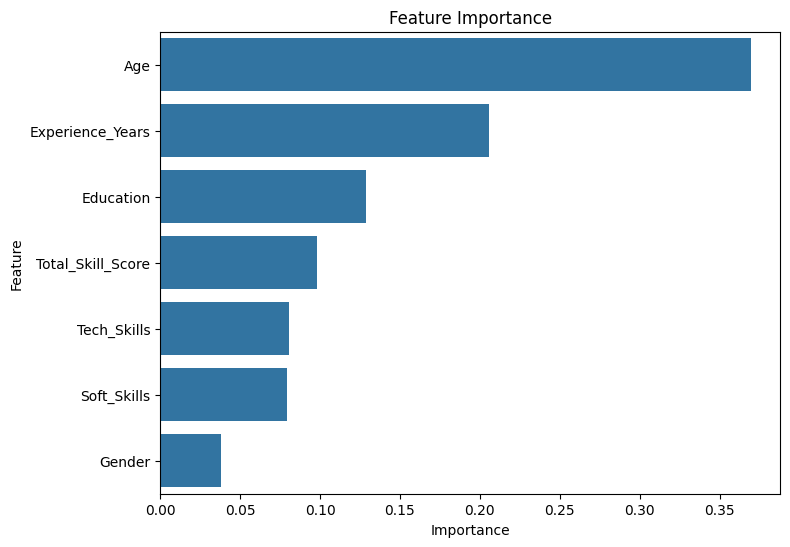

In [23]:
# Feature Importance
importances = model.feature_importances_
feat_names = X.columns
feat_imp_df = pd.DataFrame({"Feature": feat_names, "Importance": importances}).sort_values(by="Importance", ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp_df)
plt.title("Feature Importance")
plt.show()

In [24]:
import sys
import os

sys.path.append(os.path.abspath(".."))


In [29]:
from src.utility import save_model


# collect available encoder(s) into a dict so save_model can persist them
encoders = {"label_encoder": le}

save_model(model, scaler, encoders)


Model saved to model.joblib
